## Prerequisites
1. Download bartender_1.1 from https://github.com/LaoZZZZZ/bartender-1.1
2. Download BC.py
3. Create Virtualenv and ipython kernel:

   conda create -n sgQuant python=2.7 biopython==1.70
   
   conda activate sgQuant
   
   conda install ipykernel
   
   python -m ipykernel install --user --name sgQuanttest
   
   
4. Run the code in the jupyter notebook

## I. PCR design for dual-sgRNA amplicon

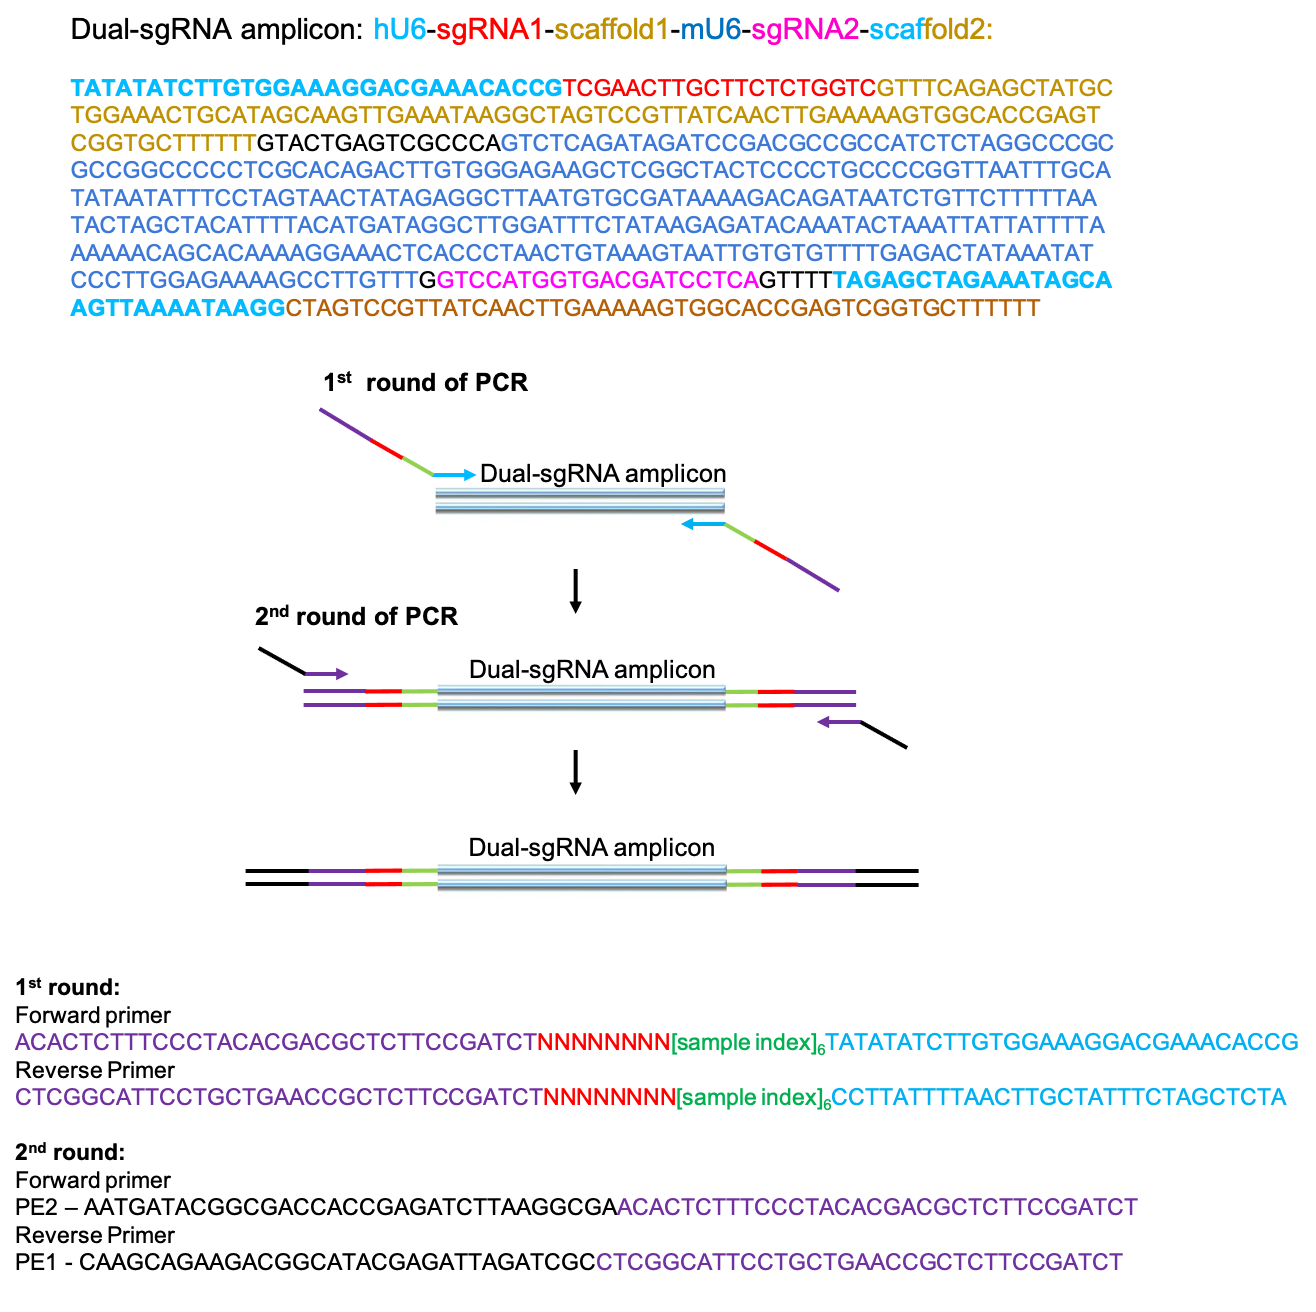

## II. An example used to explain the parameter settings in the code

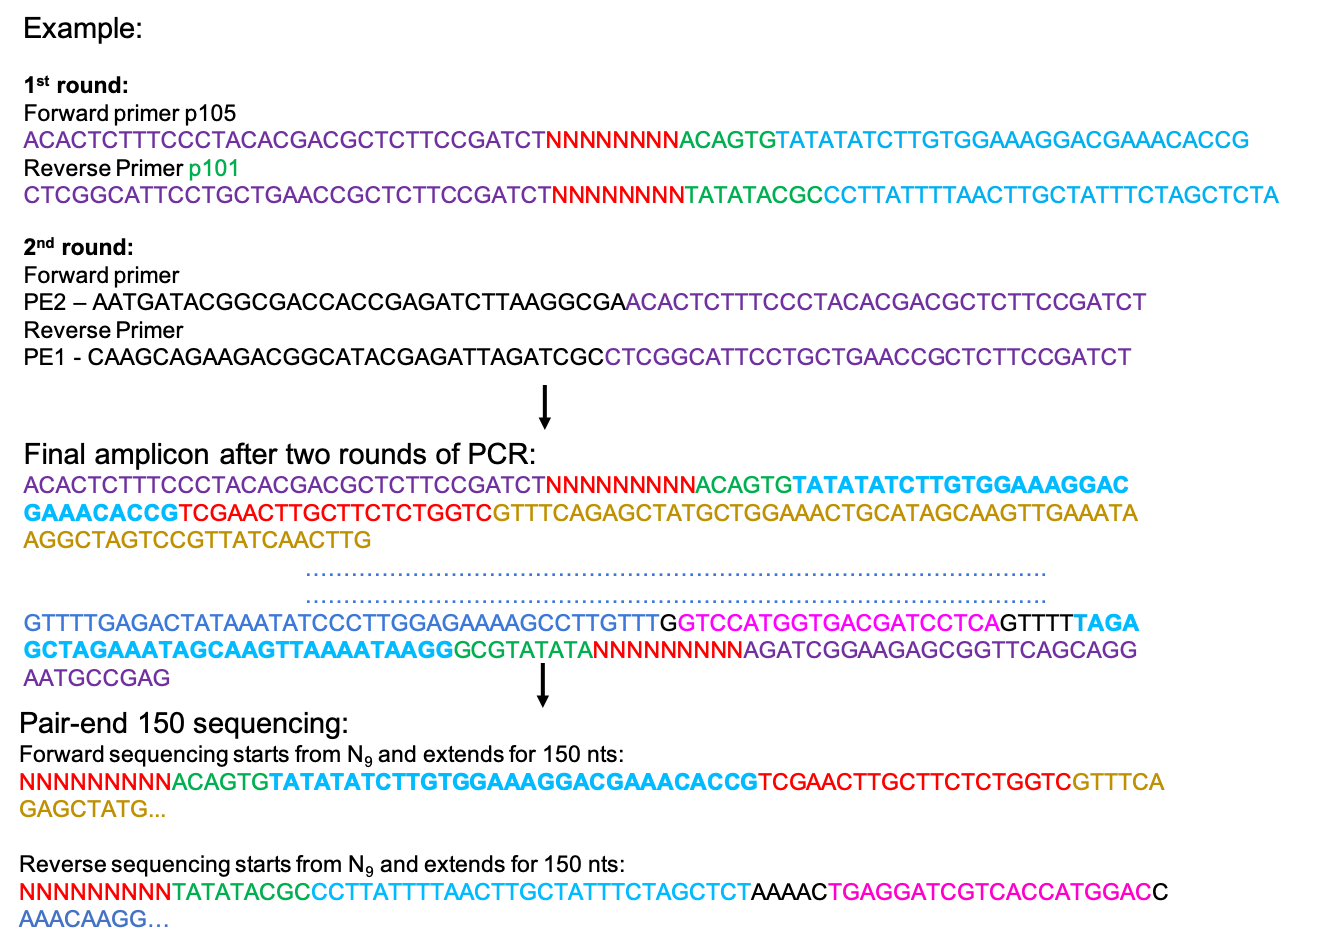

## II. Quantification of abundance of dual-sgRNAs

In [5]:
import sys
sys.path.insert(1,'/Users/xiaoyuzhao/Dropbox/code/')

In [6]:
#concatenated sample index from the forward and reverse reads
multitags = ["ACAGTGTATATA", "ACAGTGGAGACG", "TGACCATATATA", "TGACCAGAGACG", "GCCAATTATATA", "GCCAATCGCTCT", 
             "GCCAATGAGACG", "TGACCACGCTCT"] 

In [7]:
directory = "/volumes/XYZ.White20/SRA_submission_20210113/" #directory where files are read and saved
f_gzipped_fastqfile = "S01_S1_R1_001.fastq.gz" #The forward reads, gzip file
r_gzipped_fastqfile = "S01_S1_R2_001.fastq.gz" #The reverse reads, gzip file
q = "fastq" #the type of fastq file coming off of the sequencer, what format are the quality scores?

#UMI 
f_seqtag_length = 9 #the length of UMI on the forward read (N*9)
r_seqtag_length = 9 #the length of UMI on the reverse read (N*9)
#Sample index 
f_multitag_length = 6 #the length of the sample index on the forward read 
r_multitag_length = 6 #the length of the sample index on the reverse read (we have 8 nt for reverse index, but only 6 was used for parsing data)
#Spacer
f_spacer_length = 24 #distance from UMI and sample index to 1st sgRNA in forward read. length of"TATATATCTTGTGGAAAGGACGAA" = 24
r_spacer_length = 32 #distance from UMI and sample index to 2nd sgRNA in reverse read. length of "GCCCTTATTTTAACTTGCTATTTCTAGCTCTA"
#Isolate the sgRNA region
f_lintag_length = 32 #we isolated 6nt(before 1st sgRNA) + 20nt (1st sgRNA) + 6nt(after 1st sgRNA) = 32
r_lintag_length = 30 #we isolated 5nt(before 2nd sgRNA) + 20nt (2nd sgRNA) + 5nt(after 2nd sgRNA) = 30
#Qulity score threshold
min_qs = 30 #the minimum avareage quality score for both lineage tags
#Standard for the isolated sequences (32 or 30 nt)
#the 1st sgRNA must match the expression "ACCG-sgRNA-GTTT", allowing one mismatch 
lintag_grep_filter1 ='\D*?(.CCG|A.CG|AC.G|ACC.)\D{19,21}?(.TTT|G.TT|GT.T|GTT.)\D*' #1st sgRNA
#the 2nd sgRNA must match the expression "AAAC-sgRNA-CAAA", allowing one mismatch 
lintag_grep_filter2 ='\D*?(.AAC|A.AC|AA.C|AAA.)\D{19,21}?(.AAA|C.AA|CA.A|CAA.)\D*' #2nd sgRNA

clip_ends = 0 #logical of whether or not to clip the front and back ends off of lintag1 and lintag2
lintag1_front_clipper = '(.CCG|A.CG|AC.G|ACC.)' #only report lintag1 after this sequence
lintag2_front_clipper = '(.AAC|A.AC|AA.C|AAA.)' #only report lintag2 after this sequence
lintag1_rear_clipper = '(.TTG|T.TG|TT.G|TTT.)' #only report lintag1 before this sequence, this must be the REVERSE of the true sequence
lintag2_rear_clipper = '(.AAC|A.AC|AA.C|AAA.)' #only report lintag2 before this sequence, this must be the REVERSE of the true sequence

write_multitags = True #True will write multitags for all reads, otherwise only multitags for unmatched reads will be written
merged_output = False #True will merge double barcodes into one barcode and treat these as single barcodes
cores = 12 #the number of processors
frequency_cutoff = 1 #clusters less than this number of reads under this cutoff will not be reported by bartender

In [8]:
import BC
BC.count(directory, f_gzipped_fastqfile, r_gzipped_fastqfile,
      q = "fastq",
      f_seqtag_length = 9,
      r_seqtag_length = 9,
      f_multitag_length = 6,
      r_multitag_length = 6,
      f_lintag_length = 32,
      r_lintag_length = 30, 
      f_spacer_length = 24, #distance to first barcode in forward read (ignoring the length the thie multitag and the seqtag)
      r_spacer_length = 32, #distance second barcode in reverse read (ignoring the length the thie multitag and the seqtag)
      min_qs = 30, #the minimum avareage quality score for both lineage tags
      lintag_grep_filter1 = lintag_grep_filter1, #first barcode
      lintag_grep_filter2 = lintag_grep_filter2, #second barcode
      clip_ends = 1, #logical of whether or not to clip the front and back ends off of lintag1 and lintag2
      lintag1_front_clipper = lintag1_front_clipper, #only report lintag1 after this sequence
      lintag2_front_clipper = lintag2_front_clipper, #only report lintag2 after this sequence
      #lintag1_rear_clipper = lintag1_rear_clipper, #only report lintag1 before this sequence, this must be the COMPLIMENT of the true sequence
      #lintag2_rear_clipper = lintag2_rear_clipper, #only report lintag2 before this sequence, this must be the COMPLIMENT of the true sequence
      multitags = multitags, #concatenated multiplexing tags from the first and second reads that uniquely identify a sample, currently must have 2 or more multitags
      write_multitags = True, #True will write multitags for all reads, otherwise only multitags for unmatched reads will be written
      merged_output = False, #True will merge double barcodes into one barcode and treat these as single barcodes
      cores = 12, #the number of processors
      frequency_cutoff = 1) #clusters less than this number of reads under this cutoff will not be reported by bartendder

Loading S01_S1_R1_001.fastq.gz and S01_S1_R2_001.fastq.gz and parsing
Saving the combined forward and reverse sequencing tags as seqtag.txt
Saving the combined forward and reverse multiplexing tags  as multitag.txt
Saving the first lineage tag as lintag1.txt
Saving the first lineage tag as lintag2.txt


AttributeError: 'NoneType' object has no attribute 'span'